In [41]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../attacks.csv', encoding='latin-1')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
df.shape

(25723, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [5]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
#Nome_dataframe.columns = [c.lower().strip().replace('') for c in nome_dataframe.columns]
df.columns = [col.lower().strip().replace(' ', '_') for col in df.columns]

In [7]:
df

,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

In [9]:
df


,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
pd.set_option('display.max_columns', None)

In [11]:
df

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df = df.drop(['case_number', 'type', 'area', 'location', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'], axis = 1)

In [13]:
df

,date,year,country,activity
0,25-Jun-2018,2018.0,USA,Paddling
1,18-Jun-2018,2018.0,USA,Standing
2,09-Jun-2018,2018.0,USA,Surfing
3,08-Jun-2018,2018.0,AUSTRALIA,Surfing
4,04-Jun-2018,2018.0,MEXICO,Free diving
...,...,...,...,...
25718,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN


In [14]:
len(df)

25723

In [15]:
df.isnull().sum()

date        19421
year        19423
country     19471
activity    19965
dtype: int64

In [16]:
df.year = df.year.astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [17]:
#Remove all rows wit NULL values from the DataFrame.
df.dropna(subset=['date'], inplace=True)

In [18]:
df.isnull().sum()

date          0
year          2
country      50
activity    544
dtype: int64

In [19]:
df

,date,year,country,activity
0,25-Jun-2018,2018.0,USA,Paddling
1,18-Jun-2018,2018.0,USA,Standing
2,09-Jun-2018,2018.0,USA,Surfing
3,08-Jun-2018,2018.0,AUSTRALIA,Surfing
4,04-Jun-2018,2018.0,MEXICO,Free diving
...,...,...,...,...
6297,Before 1903,0.0,AUSTRALIA,Diving
6298,Before 1903,0.0,AUSTRALIA,Pearl diving
6299,1900-1905,0.0,USA,Swimming
6300,1883-1889,0.0,PANAMA,NaN


In [20]:
df.dropna(subset=['year'], inplace=True)

In [21]:
df.year = df.year.astype(int)

In [22]:
df

,date,year,country,activity
0,25-Jun-2018,2018,USA,Paddling
1,18-Jun-2018,2018,USA,Standing
2,09-Jun-2018,2018,USA,Surfing
3,08-Jun-2018,2018,AUSTRALIA,Surfing
4,04-Jun-2018,2018,MEXICO,Free diving
...,...,...,...,...
6297,Before 1903,0,AUSTRALIA,Diving
6298,Before 1903,0,AUSTRALIA,Pearl diving
6299,1900-1905,0,USA,Swimming
6300,1883-1889,0,PANAMA,NaN


In [23]:
#mostrar todos os anos
df.groupby('year').count()

,date,country,activity
year,,,
0,125,121,107
5,1,1,0
77,1,0,1
500,1,1,0
1543,1,1,1
...,...,...,...
2014,127,126,122
2015,143,143,137
2016,130,130,124


In [24]:
df = df.loc[df['year'] >= 1990]

In [25]:
new_table = df.groupby('year').count()

In [26]:
new_table

,date,country,activity
year,,,
1990,38,38,37
1991,38,38,37
1992,56,56,53
1993,56,56,52
1994,56,56,52
1995,76,76,68
1996,61,61,53
1997,57,57,54
1998,65,65,63


In [27]:
print(df['country'].value_counts())

USA                       1292
AUSTRALIA                  465
SOUTH AFRICA               195
BRAZIL                      98
BAHAMAS                     65
                          ... 
MALTA                        1
NEVIS                        1
BRITISH VIRGIN ISLANDS       1
NORWAY                       1
ANGOLA                       1
Name: country, Length: 104, dtype: int64


In [28]:
print(df['activity'].value_counts())

Surfing                                                                   790
Swimming                                                                  341
Spearfishing                                                              149
Fishing                                                                   135
Wading                                                                     91
                                                                         ... 
Attempting to chase shark out to sea                                        1
Accidentally stood on hooked shark's tail before attempting to gut it       1
Fishing from surfski                                                        1
Free-diving                                                                 1
Board sailing                                                               1
Name: activity, Length: 424, dtype: int64


In [29]:
df

,date,year,country,activity
0,25-Jun-2018,2018,USA,Paddling
1,18-Jun-2018,2018,USA,Standing
2,09-Jun-2018,2018,USA,Surfing
3,08-Jun-2018,2018,AUSTRALIA,Surfing
4,04-Jun-2018,2018,MEXICO,Free diving
...,...,...,...,...
2644,05-Mar-1990,1990,REUNION,Surfing
2645,17-Feb-1990,1990,USA,Scuba diving & spearfishing
2646,05-Feb-1990,1990,USA,Board sailing
2647,12-Jan-1990,1990,USA,Surfing (sitting on his board)


In [30]:
act = df.activity.value_counts()[:300]
act

Surfing                            790
Swimming                           341
Spearfishing                       149
Fishing                            135
Wading                              91
                                  ... 
Wading or swimming                   1
Petting a shark                      1
Playing with an air mattress         1
Body surfing or Boogie boarding      1
Floating in tube                     1
Name: activity, Length: 300, dtype: int64

In [31]:
df.activity = df.activity.str.replace('.*surf.*', 'surfing', flags=re.I, regex=True)

/var/folders/p5/gvsnflnd44l3y24z991ch7m80000gn/T/ipykernel_13499/1615294928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.activity = df.activity.str.replace('.*surf.*', 'surfing', flags=re.I, regex=True)


In [32]:
df.activity.value_counts()[:300]

surfing                                                              951
Swimming                                                             341
Spearfishing                                                         149
Fishing                                                              135
Wading                                                                91
                                                                    ... 
Playing on a sandbar                                                   1
Diving in aquarium display tank                                        1
Attempting to drive shark away from sailing regatta                    1
Fishing from a kayak                                                   1
Swept out to sea by the tsunami, she clung  to a log for 24 hours      1
Name: activity, Length: 300, dtype: int64

In [33]:
act_group = {'.*surf.*':'surfing',
             '.*Swimm.*': 'Swimming',
             '.*bath.*': 'bathing',
             '.*fish.*': 'fishing',
             '.*Diving.*': 'diving',
             '.*Snorkel.*': 'snorkeling',
             '.*Wading.*': 'wading',
             '.*board.*': 'boarding',
             '.*disaster.*': 'sea disaster',
             '.*Kayak.*': 'kayaking'
            }
for i in act_group:
    df.activity = df.activity.str.replace(i, act_group[i], flags=re.I, regex=True)

/var/folders/p5/gvsnflnd44l3y24z991ch7m80000gn/T/ipykernel_13499/677846387.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.activity = df.activity.str.replace(i, act_group[i], flags=re.I, regex=True)


In [35]:
mask = ~df.activity.isin(act_group.values()) 

In [38]:
df.loc[mask, 'activity'] = 'others'

In [198]:
print(df['activity'].value_counts())

surfing         951
fishing         416
Swimming        398
others          353
diving          164
boarding        140
wading           97
snorkeling       83
kayaking         32
sea disaster     13
Name: activity, dtype: int64


In [39]:
print(df['activity'].value_counts())

surfing         951
fishing         414
Swimming        397
others          351
diving          164
boarding        139
wading           96
snorkeling       83
kayaking         32
sea disaster     13
bathing           7
Name: activity, dtype: int64


In [70]:
paises = df.query('country == "REUNION" | country == "AUSTRALIA" | country == "SOUTH AFRICA"' )

In [71]:
paises.head()

,date,year,country,activity
3,08-Jun-2018,2018,AUSTRALIA,surfing
5,03-Jun-2018,2018,AUSTRALIA,surfing
10,24-May-2018,2018,AUSTRALIA,others
14,May 2018,2018,AUSTRALIA,others
15,12-May-2018,2018,SOUTH AFRICA,surfing


In [106]:
pd.pivot_table(index=['year'], values='activity', aggfunc='count', data=paises, columns='country' )


country,AUSTRALIA,REUNION,SOUTH AFRICA
year,,,
1990,9.0,1.0,6.0
1991,7.0,1.0,2.0
1992,6.0,4.0,3.0
1993,7.0,1.0,2.0
1994,3.0,2.0,9.0
1995,8.0,1.0,3.0
1996,12.0,1.0,4.0
1997,10.0,2.0,4.0
1998,5.0,3.0,19.0


<AxesSubplot:xlabel='year'>

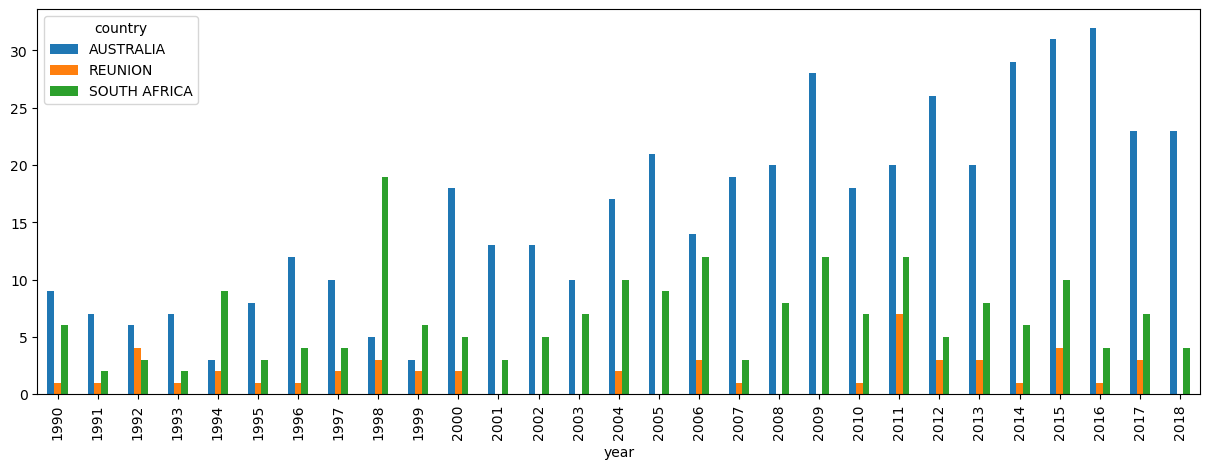

In [112]:
pd.pivot_table(index=['year'], values='activity', aggfunc='count', data=paises, columns='country' ).plot(kind='bar', figsize=(15,5))

In [93]:
atividades = df.query('activity == "surfing" | activity == "fishing" | activity == "Swimming" | activity == "diving"' )

In [110]:
pd.pivot_table(index=['year'], 
               values='country', 
               aggfunc='count', 
               data=atividades, 
               columns='activity')

activity,Swimming,diving,fishing,surfing
year,,,,
1990,3,2,6,22
1991,6,5,7,11
1992,4,9,11,19
1993,10,5,10,14
1994,7,1,8,25
1995,14,11,4,25
1996,13,7,4,19
1997,5,4,11,24
1998,7,4,10,29


<AxesSubplot:xlabel='year'>

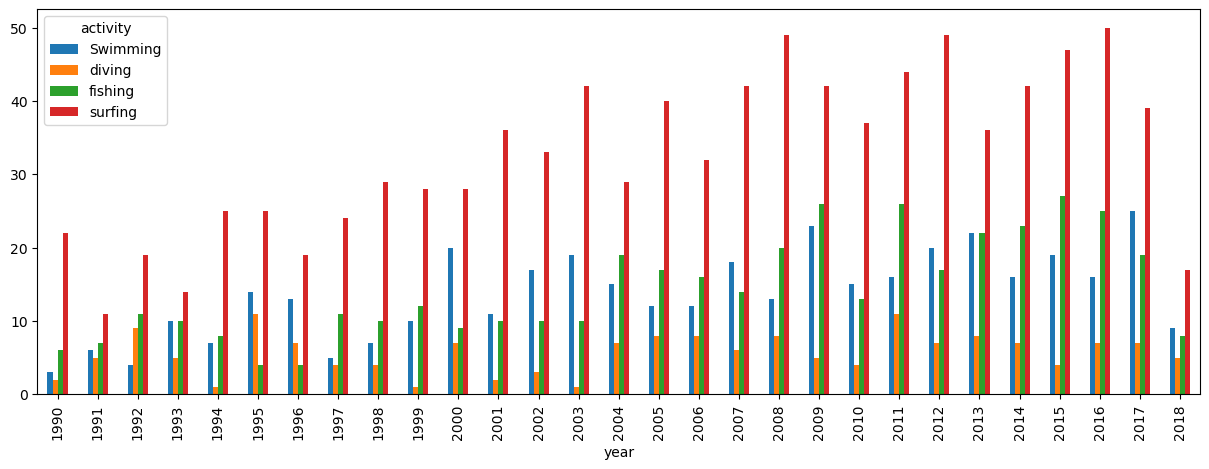

In [109]:
pd.pivot_table(index=['year'], 
               values='country', 
               aggfunc='count', 
               data=atividades, 
               columns='activity').plot(kind='bar', figsize=(15,5))